**1. zadatak (6 poena)**
<br>


Na tržištu se cena dijamanata ocenjuje na osnovu takozvanih **4C** karakteristika: kvaliteta isecanja (eng. cut),  čistoće (eng. clarity), boje (eng. color) i finoće koja se izražava u karatima (eng. carat). Potrebno je odrediti regresioni model kojim se na osnovu podataka sadržanih u datoteci *diamonds.csv* može predvideti cena dijamanata.

In [41]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [42]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

from sklearn import linear_model

a) Učitati podatke koji se nalaze u zadatoj datoteci, a potom izdvojiti podatke koji se nalaze u kolonama *carat*, *cut*, *color*, *clarity* i *price*. 

In [43]:
df = pd.read_csv('./diamonds.csv')

In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [45]:
df = df[['carat', 'cut', 'color', 'clarity', 'price']]

In [46]:
df.head()

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335


b) Nacrtati grafike zavisnosti cene dijamanata od svakog od navedenih atributa.  

In [47]:
cut_vals = df['cut'].unique()
color_vals = df['color'].unique()
clarity_vals = df['clarity'].unique()

Text(0,0.5,'Price')

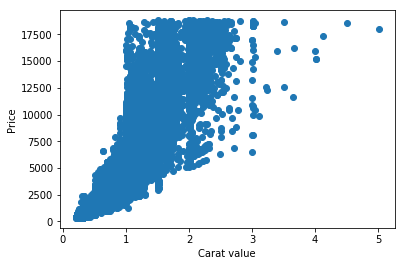

In [48]:
plt.scatter(df['carat'], df['price'])
plt.xlabel('Carat value')
plt.ylabel('Price')

Text(0,0.5,'Price')

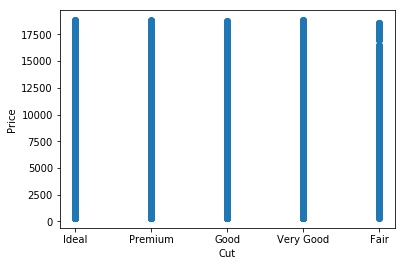

In [49]:
plt.scatter(df['cut'], df['price'])
plt.xlabel('Cut')
plt.ylabel('Price')

Text(0,0.5,'Price')

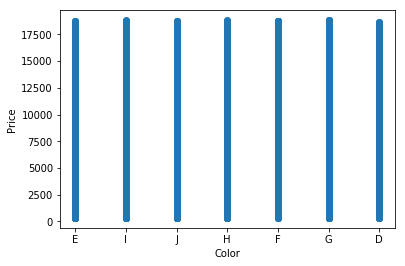

In [50]:
plt.scatter(df['color'], df['price'])
plt.xlabel('Color')
plt.ylabel('Price')

Text(0,0.5,'Price')

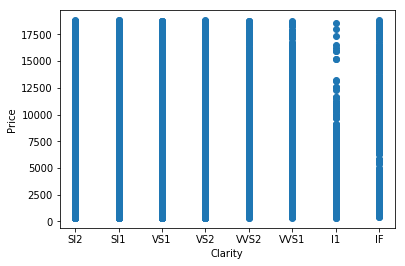

In [51]:
plt.scatter(df['clarity'], df['price'])
plt.xlabel('Clarity')
plt.ylabel('Price')

c) Izvršiti podesne transformacije kategoričkih atributa.  

In [52]:
X = df[['carat', 'cut', 'color', 'clarity']]
y = df['price']

In [53]:
X.head()

,carat,cut,color,clarity
0,0.23,Ideal,E,SI2
1,0.21,Premium,E,SI1
2,0.23,Good,E,VS1
3,0.29,Premium,I,VS2
4,0.31,Good,J,SI2


In [54]:
X = pd.get_dummies(X, columns=['cut', 'color', 'clarity'])

In [55]:
X.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [56]:
X.columns

Index(['carat', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

d) U razmeri 2:1 podeliti podatke na skup za treniranje i skup za testiranje. Za *random\_state* parametar uzeti vrednost 7.

In [57]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=7)

In [61]:
n_train_instances = X_train.shape[0]
n_test_instances = X_test.shape[0]
n_attrs = X_train.shape[1]

print(f'Train instances: {n_train_instances}')
print(f'Test instances: {n_test_instances}')
print(f'Attributes: {n_attrs}')

Train instances: 36139
Test instances: 17801
Attributes: 21


e) Odrediti grebeni regresioni model koji najbolje modeluje zadate podatke. Vrednost *alfa* metaparametra birati iz skupa [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]. Koji model je najbolji?

In [62]:
clf = linear_model.Ridge()
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = {
    'alpha': alphas,
}

In [63]:
grid = model_selection.GridSearchCV(clf, param_grid, n_jobs=4, verbose=1)

In [64]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:   14.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [65]:
grid.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
print(f'Best alpha: {grid.best_estimator_.alpha}')

Best alpha: 1


f) Dati ocenu greške najboljeg regresionog modela. 

In [69]:
train_score = grid.best_estimator_.score(X_train, y_train)
test_score = grid.best_estimator_.score(X_test, y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 0.915765408441646
Test score: 0.9162615910249543
